In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# import xgboost as xgb
# from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import RandomizedSearchCV
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.read_csv('Ranked_data.csv') 
# # Feature engineering
# df['runs_per_ball'] = df['totalrunsscored'] / df['totalballsfaced']
# df['wickets_per_over'] = df['totalwickets'] / df['oversbowled_clean']

# # Prepare the features and target
# X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank'], axis=1)
# y = df['Overall_score']

# # Encode categorical variables
# le = LabelEncoder()
# # X['Player_type'] = le.fit_transform(X['Player_type'])

# # # Scale numerical features
# # scaler = StandardScaler()
# # X_scaled = scaler.fit_transform(X)
# # X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # # Define the parameter grid for RandomizedSearchCV
# # param_grid = {
# #     'n_estimators': [100, 200, 300, 400, 500],
# #     'max_depth': [3, 4, 5, 6, 7, 8],
# #     'learning_rate': [0.01, 0.05, 0.1, 0.2],
# #     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
# #     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
# #     'min_child_weight': [1, 2, 3, 4, 5],
# #     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
# #     'reg_alpha': [0, 0.1, 1, 10],
# #     'reg_lambda': [0, 0.1, 1, 10]
# # }

# # # Initialize the XGBoost model
# # xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# # # Perform RandomizedSearchCV with cross-validation
# # xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
# #                                 n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1,
# #                                 scoring='neg_mean_squared_error')
# # xgb_random.fit(X_train, y_train)

# # # Get the best model
# # best_xgb_model = xgb_random.best_estimator_

# # # Feature selection
# # selector = SelectFromModel(best_xgb_model, prefit=True)
# # X_train_selected = selector.transform(X_train)
# # X_test_selected = selector.transform(X_test)
# # final_model = xgb.XGBRegressor(**xgb_random.best_params_, random_state=42)
# # final_model.fit(X_train_selected, y_train)

# # # Make predictions
# # y_pred = final_model.predict(X_test_selected)

# # # Calculate metrics
# # mse = mean_squared_error(y_test, y_pred)
# # r2 = r2_score(y_test, y_pred)

# # print(f"Mean Squared Error: {mse}")
# # print(f"R-squared Score: {r2}")
# # print(f"Accuracy: {r2 * 100:.2f}%")

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Ranked_data.csv') 

In [4]:
# Feature engineering
df['runs_per_ball'] = df['totalrunsscored'] / df['totalballsfaced']
df['wickets_per_over'] = df['totalwickets'] / df['oversbowled_clean']

In [5]:
df['wickets_per_over'].head()

0    0.362851
1    0.308880
2    0.355130
3    0.332640
4         NaN
Name: wickets_per_over, dtype: float64

In [6]:
df.columns.to_list()

['Unnamed: 0',
 'striker',
 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean',
 'totalrunsscored_norm',
 'Total_batting_average_norm',
 'batting_strike_rate_norm',
 'totalwickets_norm',
 'economyrate_norm',
 'Player_type',
 'Overall_score',
 'Rank',
 'runs_per_ball',
 'wickets_per_over']

In [7]:
# Prepare the features and target
X = df.drop(['Unnamed: 0', 'striker', 'Overall_score','Rank', 'totalrunsscored',
 'Total_batting_average',
 'batting_strike_rate',
 'totalballsfaced',
 'totalwickets',
 'economyrate',
 'oversbowled_clean'], axis=1)
y = df['Overall_score']

In [8]:
# Encode categorical variables
le = LabelEncoder()
X['Player_type'] = le.fit_transform(X['Player_type'])

In [9]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 10]
}


In [12]:
# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

In [13]:
# Perform RandomizedSearchCV with cross-validation
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
                                n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1,
                                scoring='neg_mean_squared_error')
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 1, 10],
                                        'reg_lambda': [0, 0.1, 1, 10],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [14]:
# Get the best model
best_xgb_model = xgb_random.best_estimator_

# Feature selection
selector = SelectFromModel(best_xgb_model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [15]:
# Train final model without early stopping
final_model = xgb.XGBRegressor(**xgb_random.best_params_, random_state=42)
final_model.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [16]:

# Make predictions
y_pred = final_model.predict(X_test_selected)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Accuracy: {r2 * 100:.2f}%")

Mean Squared Error: 85.56952012969766
R-squared Score: 0.8141541815068207
Accuracy: 81.42%


In [17]:

# Cross-validation score
cv_scores = cross_val_score(final_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation MSE: 115.0444 (+/- 42.5687)


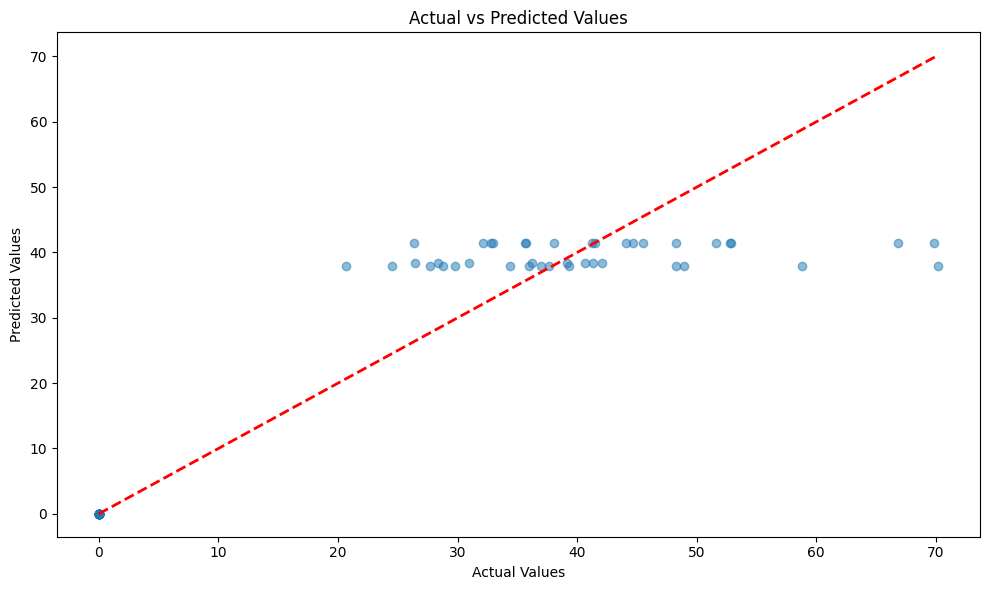

In [18]:
# 1. Actual vs Predicted values scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

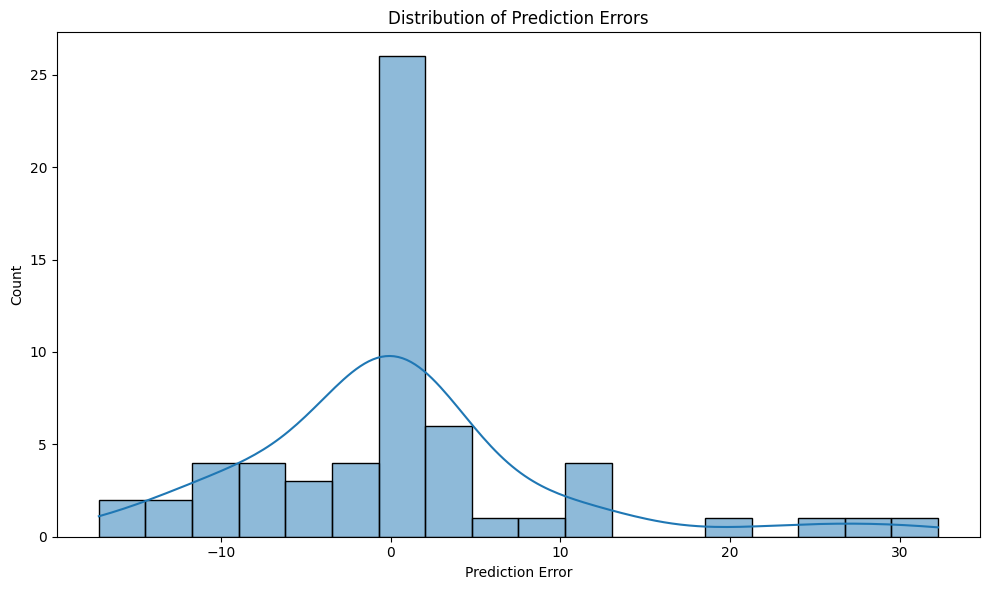

In [19]:

# 4. Prediction error distribution histogram
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()


Top 10 Important Features:
       feature  importance
0  Player_type         1.0


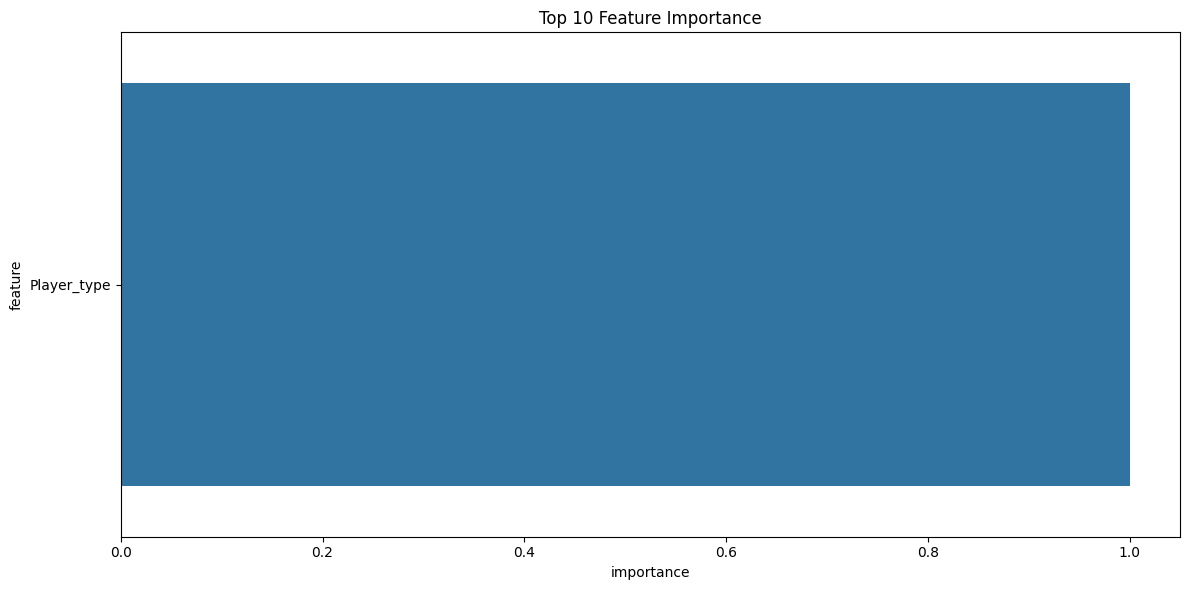

In [20]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns[selector.get_support()],
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# 3. Feature importance bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

In [21]:
# from sklearn.ensemble import StackingRegressor, VotingRegressor
# from sklearn.linear_model import ElasticNet
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.svm import SVR
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.model_selection import cross_val_score

# # Define base models
# base_models = [
#     ('xgb', xgb.XGBRegressor()),
#     ('rf', RandomForestRegressor()),
#     ('lgbm', LGBMRegressor()),
#     ('catboost', CatBoostRegressor(verbose=False)),
#     ('elastic', ElasticNet()),
#     ('krr', KernelRidge()),
#     ('svr', SVR())
# ]

# # Stacking
# stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())

# # Voting
# voting_model = VotingRegressor(estimators=base_models)

# # Gaussian Process
# gp_model = GaussianProcessRegressor()

# # Train and evaluate models
# models = [stacking_model, voting_model, gp_model]
# model_names = ['Stacking', 'Voting', 'Gaussian Process']

# for name, model in zip(model_names, models):
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     print(f"{name} MSE: {-scores.mean():.4f} (+/- {scores.std() * 2:.4f})")